<a href="https://colab.research.google.com/github/Nidhi89717/ML/blob/main/24_Distribution_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distributions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df =pd.read_csv('gdrive/My Drive/csv_files/dm_office_sales.csv')

In [4]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


## Rugplot

Very simple plot that puts down one mark per data point. This plot needs the single array passed in directly. We won't use it too much since its not very clarifying for large data sets.

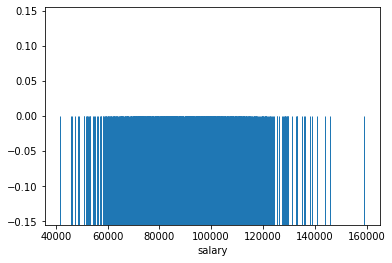

In [5]:
sns.rugplot(x='salary',data=df,height=0.5);

## displot() and histplot()  
The rugplot itself is not very informative for larger data sets distribution around the mean since so many ticks makes it hard to distinguish one tick from another. Instead we should count the number of tick marks per some segment of the x axis, then construct a histogram from this.

The displot is a plot type that can show you the distribution of a single feature. It is a histogram with the option of adding a "KDE" plot (Kernel Density Estimation) on top of the histogram. 

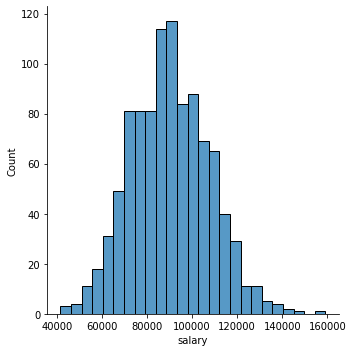

In [6]:
sns.displot(data=df,x='salary');

### Adding in a grid and styles

You can reset to a different default style: one of {darkgrid, whitegrid, dark, white, ticks}.


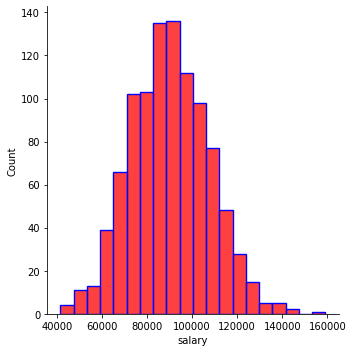

In [7]:
#sns.set(style='darkgrid')
sns.displot(data=df,x='salary',bins=20,color='red',edgecolor='blue',lw=5)

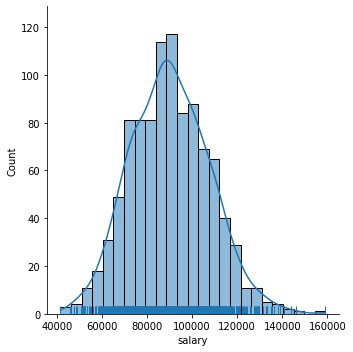

In [8]:
sns.displot(data=df,x='salary',kde=True,rug=True)

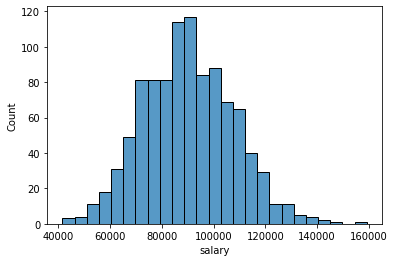

In [9]:
sns.histplot(data=df,x='salary')

### Number of Bins

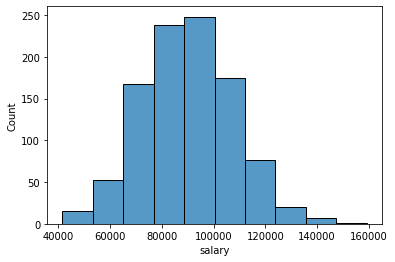

In [21]:
sns.histplot(data=df,x='salary',bins=10);

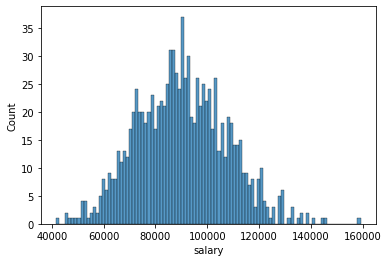

In [22]:
sns.histplot(data=df,x='salary',bins=100)

### Adding in keywords from matplotlib

Seaborn plots can accept keyword arguments directly from the matplotlib code that seaborn uses.<br>
**Not every seaborn plot can accept all matplotlib arguments, but the main styling parameters given here are available.** 

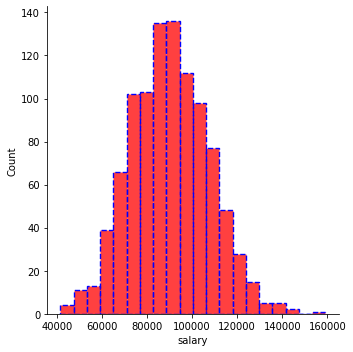

In [24]:
sns.displot(data=df,x='salary',color='red',bins=20,kde=False,lw=5,edgecolor='blue',ls='--');

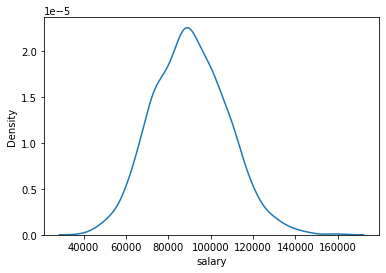

In [10]:
sns.kdeplot(data=df,x='salary')

## The Kernel Density Estimation Plot

The KDE plot maps an estimate of a probability *density* function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.


In [11]:
np.random.seed(42)
sample_ages = np.random.randint(0,100,200)

In [12]:
sample_ages

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74, 87, 99, 23,  2, 21, 52,  1,
       87, 29, 37,  1, 63, 59, 20, 32, 75, 57, 21, 88, 48, 90, 58, 41, 91,
       59, 79, 14, 61, 61, 46, 61, 50, 54, 63,  2, 50,  6, 20, 72, 38, 17,
        3, 88, 59, 13,  8, 89, 52,  1, 83, 91, 59, 70, 43,  7, 46, 34, 77,
       80, 35, 49,  3,  1,  5, 53,  3, 53, 92, 62, 17, 89, 43, 33, 73, 61,
       99, 13, 94, 47, 14, 71, 77, 86, 61, 39, 84, 79, 81, 52, 23, 25, 88,
       59, 40, 28, 14, 44, 64, 88, 70,  8, 87,  0,  7, 87, 62, 10, 80,  7,
       34, 34, 32,  4, 40, 27,  6, 72, 71, 11, 33, 32, 47, 22, 61, 87, 36,
       98, 43, 85, 90, 34, 64, 98, 46, 77,  2,  0,  4, 89, 13, 26,  8, 78,
       14, 89, 41, 76, 50, 62, 95, 51, 95,  3, 93, 22, 14, 42, 28, 35, 12,
       31, 70, 58, 85, 27, 65, 41, 44, 61, 56,  5, 27, 27, 43, 83, 29, 61,
       74, 91, 88, 61, 96,  0, 26, 61, 76,  2, 69, 71, 26])

In [13]:
from tables.table import Cols
sample_ages = pd.DataFrame(sample_ages,columns=['age'])

In [14]:
sample_ages

,age
0,51
1,92
2,14
3,71
4,60
...,...
195,76
196,2
197,69
198,71


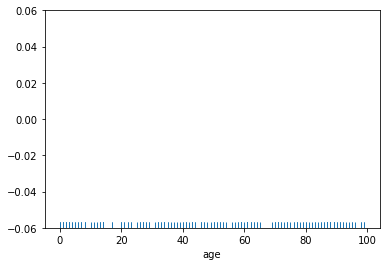

In [15]:
sns.rugplot(data=sample_ages,x='age')

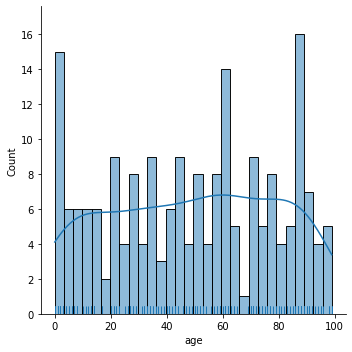

In [16]:
sns.displot(data=sample_ages,x='age',bins=30,rug=True,kde=True)

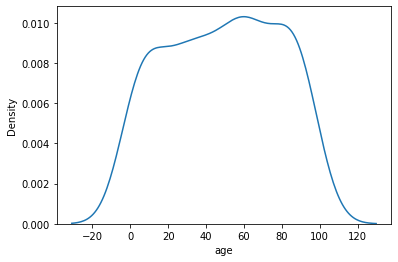

In [17]:
sns.kdeplot(data=sample_ages,x='age')

### Cut Off KDE

We could cut off the KDE if we know our data has hard limits (no one can be a negative age and no one in the population can be older than 100 for some reason)

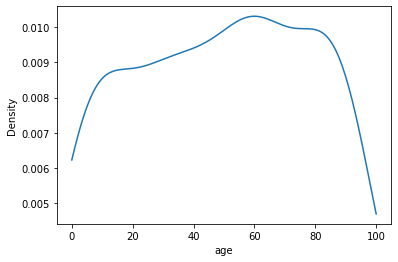

In [18]:
sns.kdeplot(data=sample_ages,x='age',clip=[0,100])

### Bandwidth

KDE is constructed through the summation of the kernel (most commonly Gaussian), we can effect the bandwith of this kernel to make the KDE more "sensitive" to the data. Notice how with a smaller bandwith, the kernels don't stretch so wide, meaning we don't need the cut-off anymore. This is analagous to increasing the number of bins in a histogram (making the actual bins narrower).

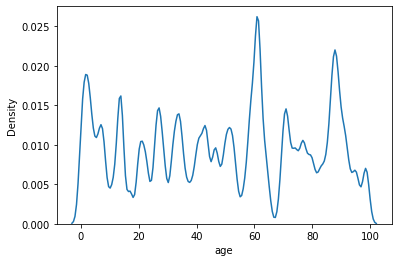

In [25]:
sns.kdeplot(data=sample_ages,x='age',bw_adjust=0.1)

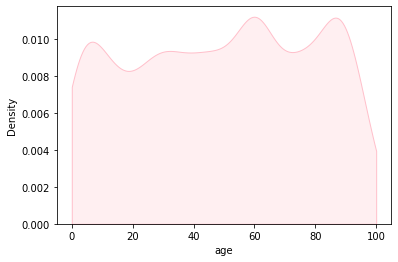

In [26]:
sns.kdeplot(data=sample_ages,x='age',clip=[0,100],bw_adjust=0.6,shade=True,color='pink')